In [1]:
import numpy as np

from tqdm.notebook import tqdm

In [2]:
# Primero la clase básica de lo que es una capa, el molde

class Layer:
    
    def __init__(self):
        '''
        Todas las capa tienes entrada y salida de datos, método constructor
        '''
        self.input = None # X
        self.output = None # Y

        
    def forward_propagation(self, input_):
        '''
        Propagación hacia adelante, calcula la salida Y de la capa dada la entrada X
        '''
        pass

    
    def backward_propagation(self, output_error, learning_rate):
        '''
        Propagación hacia atrás, calcula dE/dX dado dE/dY, y actuliza parámetros 
        '''
        pass

### Capa Dense (Full Connected)

In [3]:
# Capa completamente conectada, hereda de la clase base Layer

class Dense(Layer):
    
    def __init__(self, input_size, output_size):
        '''
        input_size = número de neuronas de entrada
        output_size = número de neuronas de salida
        '''
        
        # inicialización aleatoria de parámetros con las dimensiones adecuadas
        self.weights = np.random.rand(input_size, output_size) - 0.5   # pesos, betas 1-n (W)
        self.bias = np.random.rand(1, output_size) - 0.5               # sesgo, ordenada en el origen, beta0 (B)


    def forward_propagation(self, input_data):
        '''
        Dados unos datos de entrada X, devuelve Y = XW+B
        '''
        
        self.input = input_data   # datos de entrada, atributo heredado
        
        self.output = np.dot(self.input, self.weights) + self.bias  # salida Y = XW+B, atributo heredado
        
        return self.output
    


    def backward_propagation(self, output_error, learning_rate):
        '''
        Dados el error de salida (output_error=dE/dY) y la tasa de aprendizaje,
        calcula dE/dX, dE/dW y dE/dB, y devuelve el error de entrada (input_error=dE/dX)
        '''
        
        input_error = np.dot(output_error, self.weights.T)  # dE/dX = dE/dY * W^t
        weights_error = np.dot(self.input.T, output_error)  # dE/dW = X^t * dE/dY
        # dBias = output_error                              # dE/dB = dE/dY

        # update parameters
        self.weights -= learning_rate * weights_error    # W = W - a*dE/dW
        self.bias -= learning_rate * output_error        # B = B - a*dE/dY
        
        return input_error

### Capa de Activación

In [4]:
# capa de activación base, valida para cualquier función de activación, hereda de la clase base Layer

class Activation(Layer):
    
    def __init__(self, activation, activation_prime):
        '''
        activation = función de activación
        activation_prime = derivada de la función de activación
        '''
        
        self.activation = activation
        self.activation_prime = activation_prime


    def forward_propagation(self, input_data):
        '''
        Devuelve la evaluación de la función de activación
        '''
        
        self.input = input_data
        self.output = self.activation(self.input)
        
        return self.output

    
    def backward_propagation(self, output_error, learning_rate):
        '''
        Dado el error de salida (output_error=dE/dY),
        calcula dE/dX, en este caso no se usa la tasa de aprendizaje,
        no hay nada que aprender, solo evaluar.
        '''
        
        return self.activation_prime(self.input) * output_error

**Ejemplo función de activación**

In [5]:
# tangente hiperbólica
def tanh(x):
    return np.tanh(x)



# derivada de la tangente hiperbólica
def tanh_prime(x):
    return 1 - np.tanh(x)**2

### Función de Pérdida/Coste

In [6]:
# función de coste
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))



# derivada de la función de coste
def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

### Clase Red Neuronal

In [7]:
# clase red neuronal

class Network:
    
    def __init__(self):
        '''
        Se inician los atributos: capas y función de perdida.
        '''
        
        self.layers = []          # lista de capas de la red
        self.loss = None          # función de coste
        self.loss_prime = None    # derivada de la función de coste

        
    
    def add(self, layer):
        '''
        Método para añadir una capa a la red.
        '''
        self.layers.append(layer)

        

    def use(self, loss, loss_prime):
        '''
        Método para establecer la función de coste. Sobreescribe atributos
        '''
        self.loss = loss
        self.loss_prime = loss_prime

        

    def predict(self, input_data):
        '''
        Método para predecir dada una entrada. Evalúa todas las capas.
        Devuelve una lista de predicciones.
        '''
        
        # número de muestras y lista vacía para guardar resultados
        samples = len(input_data)
        result = []

        # para cada muestra, ejecuta la red..
        for i in range(samples):
            
            # forward propagation, se evalúa cada capa
            output = input_data[i]
            
            # para cada capa...
            for layer in self.layers:
                output = layer.forward_propagation(output)
            
            # guarda la prediccion
            result.append(output)

        return result

    

    def fit(self, X_train, y_train, epochs, learning_rate):
        '''
        Método para entrenar la red neuronal.
        Recibe los datos de entrenamiento (X, y), el número de épocas y la tasa de apredizaje.
        No devuelve nada, actualiza los pesos de cada capa de la red.
        '''
        
        # número de muestras
        samples = len(X_train)
        
        print_err = 0   # inicia error a cero, solo para ver
        
        # bucle de entrenamiento, para cada época....
        for i in tqdm(range(epochs), desc='Epochs'):
            
            # para cada muestra de los datos...
            for j in tqdm(range(samples), leave=False, bar_format=f'Loss Value --- {print_err}'):  
                                
                # forward propagation, se evalúa cada capa
                output = X_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                    
                
                # backward propagation, se actualizan los pesos de la red llevando el error hacia atrás 
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)
                    
                
                # calcula la pérdida, solo para ver el error
                print_err = self.loss(y_train[j], output)


# TEST

### Datos Mnist

![mnist](../images/mnist.jpeg)

El MNIST es un conjunto de datos desarrollado por Yann LeCun, Corinna Cortes y Christopher Burges para la evaluación de modelos de aprendizaje de máquinas sobre el problema de la clasificación de los dígitos escritos a mano. La base de datos se construyó a partir de varios conjuntos de datos de documentos escaneados disponibles en la carpeta Instituto Nacional de Estándares y Tecnología (NIST).

Las imágenes de los dígitos fueron tomadas de una variedad de documentos escaneados, normalizados en tamaño y centrado. Esto lo convierte en un excelente conjunto de datos para evaluar modelos, permitiendo al desarrollador centrar el aprendizaje de la máquina con muy poca limpieza de datos. Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total). Se utiliza una división estándar del conjunto de datos para evaluar y comparar modelos, en la que se utilizan 60.000 imágenes para formar un modelo y un conjunto separado de 10.000 imágenes para probarlo.

Es una tarea de reconocimiento de dígitos. Como tal, hay 10 dígitos (0 a 9) o 10 clases para predecir.

In [8]:
from keras.datasets import mnist
from keras.utils import to_categorical

import pylab as plt

In [9]:
# cargar datos 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
# normalizar X_train

X_train = X_train.reshape(X_train.shape[0], 1, 28*28)

X_train = X_train.astype('float32')

X_train /= 255

In [11]:
X_train.shape

(60000, 1, 784)

In [12]:
print('Antes:   ', y_train.shape)

# one-hot para la y, es decir desde intervalo [0,9] a vector de tamaño 10

# e.g. número 3 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train_onehot = to_categorical(y_train)

print('Despues: ', y_train_onehot.shape)

Antes:    (60000,)
Despues:  (60000, 10)


In [13]:
# lo mismo con el paquete de testeo

X_test = X_test.reshape(X_test.shape[0], 1, 28*28)

X_test = X_test.astype('float32')

X_test /= 255

X_test.shape

(10000, 1, 784)

In [14]:
print('Antes:   ', y_test.shape)

y_test_onehot = to_categorical(y_test)

print('Despues: ', y_test_onehot.shape)

Antes:    (10000,)
Despues:  (10000, 10)


### Construcción de la red

In [15]:
# red de 3 capas

net = Network()                           # inicia una red vacia de capas, y ahora añade...


net.add(Dense(28*28, 100))                # input_shape=(1, 28*28) ; output_shape=(1, 100)
net.add(Activation(tanh, tanh_prime))

net.add(Dense(100, 50))                   # input_shape=(1, 100) ; output_shape=(1, 50)
net.add(Activation(tanh, tanh_prime))

net.add(Dense(50, 10))                    # input_shape=(1, 50) ; output_shape=(1, 10)
net.add(Activation(tanh, tanh_prime))


**Entrenamiento de la red**

In [16]:
# se elige la función de pérdida, error cuadrático medio y su derivada
net.use(mse, mse_prime)

In [17]:
# se entrena el modelo con N datos, 35 épocas y 0.1 de tasa de aprendizaje

N = 5000

net.fit(X_train[0:N], y_train_onehot[0:N], epochs=35, learning_rate=0.1)

Epochs:   0%|          | 0/35 [00:00<?, ?it/s]

Loss Value --- 0

Loss Value --- 0.042475995243952375

Loss Value --- 0.025107932732570327

Loss Value --- 0.004761911798898094

Loss Value --- 0.004488487093079172

Loss Value --- 0.0037073713851135037

Loss Value --- 0.0028273575460137867

Loss Value --- 0.002149916258848923

Loss Value --- 0.0018690005863961658

Loss Value --- 0.001902245625939163

Loss Value --- 0.0020173973566944333

Loss Value --- 0.0018810125828191003

Loss Value --- 0.001693666574050017

Loss Value --- 0.0012474708280162425

Loss Value --- 0.0011232009342993787

Loss Value --- 0.001033648625407761

Loss Value --- 0.0011929960232805845

Loss Value --- 0.0013512941616898983

Loss Value --- 0.0012331175536089358

Loss Value --- 0.0010237800298297961

Loss Value --- 0.0013096950139290947

Loss Value --- 0.0011862298541475355

Loss Value --- 0.001289537629836202

Loss Value --- 0.0013906659626223233

Loss Value --- 0.001396202200732686

Loss Value --- 0.0013640396530472092

Loss Value --- 0.0017070336909553352

Loss Value --- 0.0015146535745972287

Loss Value --- 0.0015195956847635136

Loss Value --- 0.0012802824404850484

Loss Value --- 0.0012602011689729284

Loss Value --- 0.001468077927674765

Loss Value --- 0.001157822074685258

Loss Value --- 0.0012728508211429298

Loss Value --- 0.0011242352676100566

**Testeo de la red**

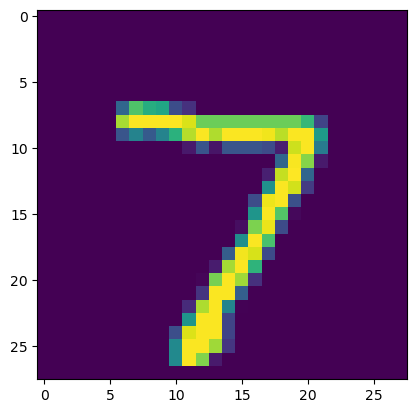

In [18]:
# primera foto del testeo

plt.imshow(X_test[0].reshape((28, 28)));

In [19]:
# etiqueta de la primera foto

y_test[0]

7

In [20]:
# etiqueta de la primera foto, one-hot

y_test_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [21]:
# sacando el indice del valor maximo me da la etiqueta real

np.argmax(y_test_onehot[0])

7

In [22]:
# prediccion de la primera foto ¿? - sale de minimizar un MSE, es continuo

net.predict(X_test[0])[0][0]

array([ 0.00631953,  0.00678569,  0.00737311,  0.04028265,  0.01900836,
        0.0033776 , -0.02326584,  0.96673001,  0.00717942, -0.03119038])

In [23]:
# de nuevo, sacando el indice del valor maximo me da la etiqueta real

pred = net.predict(X_test[0])[0][0]

np.argmax(pred)

7

In [24]:
# predicciones

y_hat = net.predict(X_test)   # salida directa de la red  

y_pred = [np.argmax(e[0]) for e in y_hat]   # etiqueta 

In [25]:
y_hat[0]

array([[ 0.00631953,  0.00678569,  0.00737311,  0.04028265,  0.01900836,
         0.0033776 , -0.02326584,  0.96673001,  0.00717942, -0.03119038]])

In [26]:
y_pred[0]

7

**Evaluando el modelo**

In [27]:
from sklearn.metrics import accuracy_score as acc

from sklearn.metrics import f1_score as f1

from sklearn.metrics import confusion_matrix as cm

import seaborn as sns

In [28]:
# acierto

acc(y_test, y_pred)

0.8952

In [29]:
# F1 score

f1(y_test, y_pred, average='micro')

0.8952000000000001

In [30]:
f1(y_test, y_pred, average='macro')

0.893800108141819

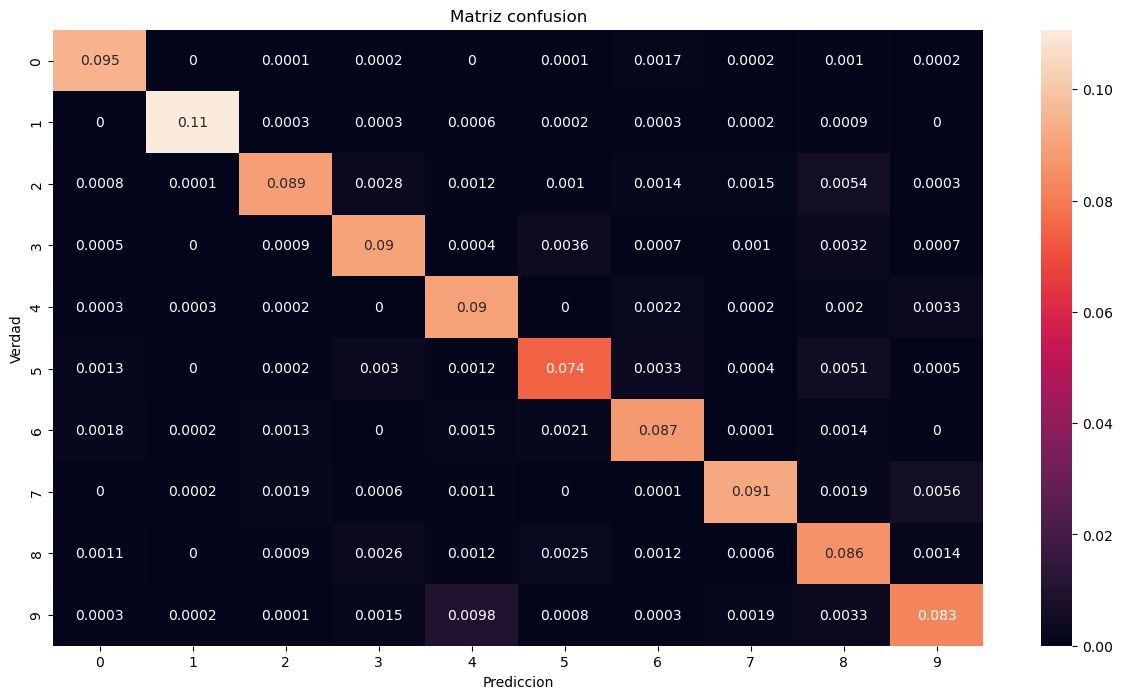

In [31]:
# matriz de confusión

plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/cm(y_test, y_pred).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();